# Task: Phân lớp bàn cờ Tic-tac-toe 0: không ai thắng, 1: O thắng, 2: X thắng
## Bàn cờ tic-tac-toe
```
XOX
OXO --> X thắng
XO.
```
## Performance: Tỉ lệ đoán đúng trên tập kiểm tra
## Experience: Cả tập huấn luyên (train) và tập kiểm tra (test) được sinh bằng cách cho chơi ngẫu nhiên

In [59]:
import random
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import matplotlib.pyplot as plt
from sklearn import tree

In [32]:
def play_game(board, player):
    '''play a move of player O or player X on the board
    Return: the new board
    '''
    choices = []
    for i in range(3):
        for j in range(3):
            if board[i][j] == '.':
                choices.append((i,j))
    i, j = random.choice(choices)
    board[i][j] = 'O' if player == 0 else 'X'
    return board

def game_result(board):
    '''check for the game result of the current board
    Return: O: no one wins, 1: O wins, 2: X wins
    '''
    for i in range(3):
        if board[i][0]=='O' and board[i][1]=='O' and board[i][2]=='O': return 1
        if board[i][0]=='X' and board[i][1]=='X' and board[i][2]=='X': return 2
        if board[0][i]=='O' and board[1][i]=='O' and board[2][i]=='O': return 1
        if board[0][i]=='X' and board[1][i]=='X' and board[2][i]=='X': return 2
    if board[0][0]=='O' and board[1][1]=='O' and board[2][2]=='O': return 1
    if board[0][0]=='X' and board[1][1]=='X' and board[2][2]=='X': return 2
    if board[0][2]=='O' and board[1][1]=='O' and board[2][0]=='O': return 1
    if board[0][2]=='X' and board[1][1]=='X' and board[2][0]=='X': return 2
    return 0

def generate_sample(not_finished_game=0.05):
    '''return a tic-tac-toe board and the game result'''
    board = [['.','.','.'],['.','.','.'],['.','.','.']]
    for i in range(9):
        board = play_game(board=board, player=i%2)
        result = game_result(board)
        if result > 0 or random.random() < not_finished_game:
            return {'board': board, 'result': result}
    return {'board': board, 'result': result}



In [33]:
def board_to_row(board):
    '''convert a board to a list of 0 for ., 1 for O, 2 for X'''
    v = [0]*9
    for i in range(3):
        for j in range(3):
            v[i*3+j] = 0 if board[i][j]=='.' else (1 if board[i][j] == 'O' else 2)
    return v

def dataset_to_numpy(dataset):
    '''convert a dataset to numpy array'''
    y = [d['result'] for d in dataset]
    X = [board_to_row(d['board']) for d in dataset]
    return np.array(X), np.array(y)



In [40]:



# we vary the train set size to see the improvement in performance on test set
for n_train in [100, 1000, 10000, 100000]:
    train_set = [generate_sample() for _ in range(n_train)]
    xtrain, ytrain = dataset_to_numpy(train_set)
    
    # fit a Decision Tree to the train set
    clf = DecisionTreeClassifier(min_samples_leaf=5)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    accuracy = (ypred==ytest).sum() / len(ytest)
    print(f"n_train {n_train} accuracy {accuracy*100:.2f}")

n_train 100 accuracy 55.44
n_train 1000 accuracy 76.06
n_train 10000 accuracy 93.51
n_train 100000 accuracy 99.57


In [46]:
Ns = [100, 500, 1000, 5000, 10000, 50000, 100000]
# fix a test set
n_test  = 10000
test_set = [generate_sample() for _ in range(n_test)]
xtest, ytest = dataset_to_numpy(test_set)

train_sets = [[generate_sample() for _ in range(n_train)] for n_train in Ns]
xy_train_sets = [dataset_to_numpy(train_set) for train_set in train_sets]

In [47]:
def get_accuracy(xy_train_set, clf):
    xtrain, ytrain = xy_train_set
    # fit the model to the train set
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    accuracy = (ypred==ytest).sum() / len(ytest)
    return accuracy

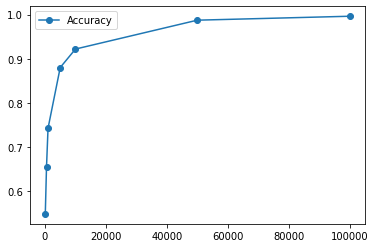

In [49]:
acc = [get_accuracy(train_set, DecisionTreeClassifier(min_samples_leaf=5)) for train_set in xy_train_sets]
plt.plot(Ns, acc, '-o', label='Accuracy')
plt.legend()
plt.show()

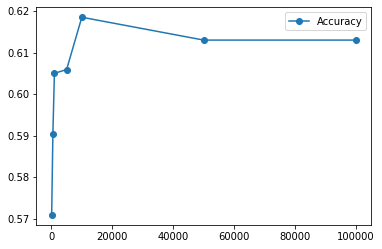

In [51]:
gaussianNB_acc = [get_accuracy(train_set, GaussianNB()) for train_set in xy_train_sets]
plt.plot(Ns, gaussianNB_acc, '-o', label='Accuracy')
plt.legend()
plt.show()

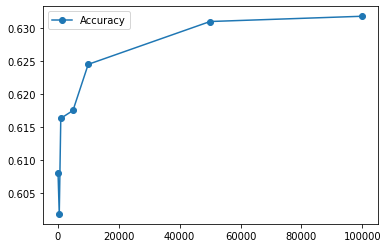

In [52]:
categoricalNB_acc = [get_accuracy(train_set, CategoricalNB()) for train_set in xy_train_sets]
plt.plot(Ns, categoricalNB_acc, '-o', label='Accuracy')
plt.legend()
plt.show()

In [61]:
def get_accuracy_preprocess(xy_train_set, clf, __preprocess):
    '''preprocess the input before training and testing'''
    xtrain, ytrain = xy_train_set
    xtrain = __preprocess(xtrain)
    # fit the model to the train set
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(__preprocess(xtest))
    accuracy = (ypred==ytest).sum() / len(ytest)
    return accuracy

def preprocess(X):
    return np.matmul(X, np.array([
        [1, 0, 0, 0, 0, 0, 0, 0, 0,   1,  0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0,   0,  1, 0,-2, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0,   0,  0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0,  -2,  0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0,   0, -2, 0, 0,-2, 0,-2,-2],
        [0, 0, 0, 0, 0, 1, 0, 0, 0,   0,  0,-2, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0,   1,  0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0,   0,  1, 0, 0, 0,-2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1,   0,  0, 1, 0, 0, 1, 1, 0],
    ]))

In [62]:
categoricalNB_acc = [get_accuracy_preprocess(train_set, CategoricalNB(), preprocess) for train_set in xy_train_sets]
plt.plot(Ns, categoricalNB_acc, '-o', label='Accuracy')
plt.legend()
plt.show()

ValueError: X must not contain negative values.

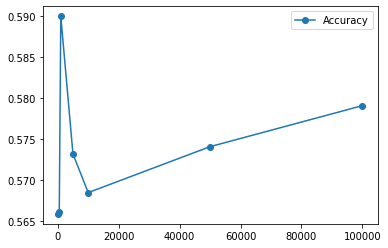

In [63]:
gaussianNB_acc = [get_accuracy_preprocess(train_set, GaussianNB(), preprocess) for train_set in xy_train_sets]
plt.plot(Ns, gaussianNB_acc, '-o', label='Accuracy')
plt.legend()
plt.show()

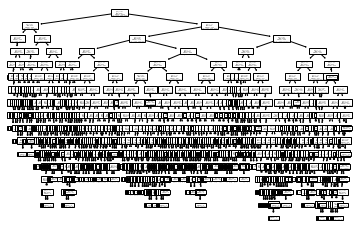

In [60]:
tree.plot_tree(clf);